In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet50
import matplotlib.pyplot as plt
from tqdm import tqdm


In [22]:
# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # ResNet requires 3 channels
    transforms.Resize((224, 224)),  # Resize to 224x224 as ResNet50 expects
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [23]:
# Load FashionMNIST datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=8)


In [24]:
# Initialize ResNet50 model, modify the final layer to match the FashionMNIST classes (10)
model = resnet50(weights=True)
model.fc = nn.Linear(model.fc.in_features, 10)  # FashionMNIST has 10 classes

In [25]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

cuda


In [26]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [27]:
def train_model(model, train_loader, criterion, optimizer, test_loader, num_epochs=10):
    model.train()
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        # Validate and track accuracy after each epoch
        accuracy = validate_model(model, test_loader)
        test_accuracies.append(accuracy)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")

    return train_losses, test_accuracies


In [28]:
# Validation function
def validate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    # Set back to train mode after validation
    model.train() 
    return accuracy


Training Epoch 1/10: 100%|██████████| 235/235 [01:11<00:00,  3.28it/s]


Epoch [1/10], Loss: 0.3110, Validation Accuracy: 89.41%


Training Epoch 2/10: 100%|██████████| 235/235 [01:11<00:00,  3.29it/s]


Epoch [2/10], Loss: 0.2091, Validation Accuracy: 91.97%


Training Epoch 3/10: 100%|██████████| 235/235 [01:11<00:00,  3.27it/s]


Epoch [3/10], Loss: 0.1756, Validation Accuracy: 92.10%


Training Epoch 4/10: 100%|██████████| 235/235 [01:11<00:00,  3.28it/s]


Epoch [4/10], Loss: 0.1489, Validation Accuracy: 91.62%


Training Epoch 5/10: 100%|██████████| 235/235 [01:11<00:00,  3.28it/s]


Epoch [5/10], Loss: 0.1373, Validation Accuracy: 93.04%


Training Epoch 6/10: 100%|██████████| 235/235 [01:12<00:00,  3.23it/s]


Epoch [6/10], Loss: 0.1180, Validation Accuracy: 93.10%


Training Epoch 7/10: 100%|██████████| 235/235 [01:12<00:00,  3.25it/s]


Epoch [7/10], Loss: 0.0986, Validation Accuracy: 92.90%


Training Epoch 8/10: 100%|██████████| 235/235 [01:13<00:00,  3.22it/s]


Epoch [8/10], Loss: 0.0867, Validation Accuracy: 92.92%


Training Epoch 9/10: 100%|██████████| 235/235 [01:12<00:00,  3.26it/s]


Epoch [9/10], Loss: 0.0718, Validation Accuracy: 92.61%


Training Epoch 10/10: 100%|██████████| 235/235 [01:12<00:00,  3.24it/s]


Epoch [10/10], Loss: 0.0589, Validation Accuracy: 92.29%


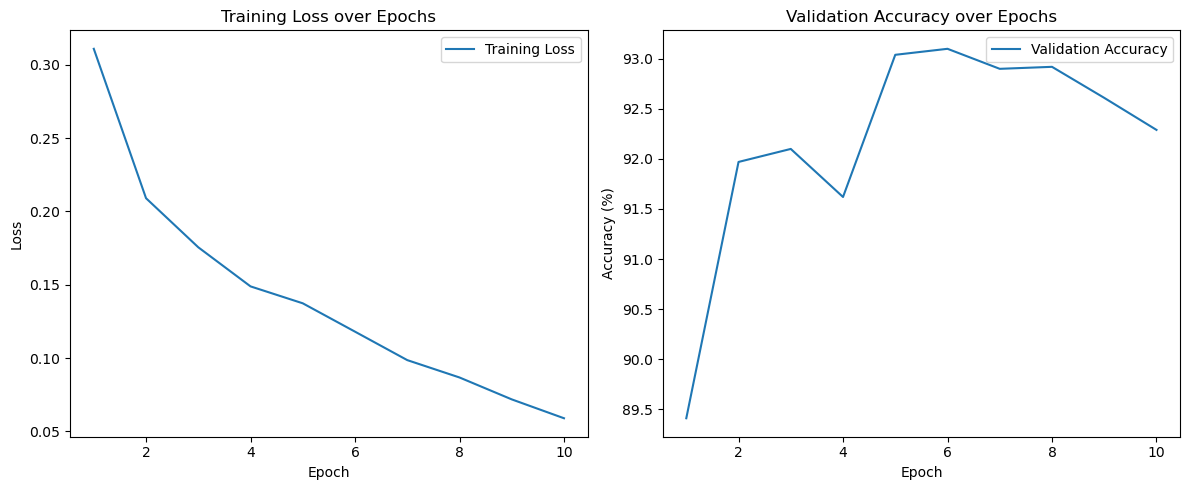

In [29]:
# Plot function for loss and accuracy
def plot_metrics(train_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Plotting Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    
    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Train and validate the model
num_epochs = 10
train_losses, test_accuracies = train_model(model, train_loader, criterion, optimizer, test_loader, num_epochs)

# plot metrics
plot_metrics(train_losses, test_accuracies)

Without pretrained Model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet50
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # ResNet requires 3 channels
    transforms.Resize((224, 224)),  # Resize to 224x224 as ResNet50 expects
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Load FashionMNIST datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


In [5]:
# Initialize ResNet50 model without pretrained weights
model = resnet50(weights=False)
model.fc = nn.Linear(model.fc.in_features, 10)  # FashionMNIST has 10 classes


In [6]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
# Training function with accuracy tracking
def train_model(model, train_loader, criterion, optimizer, test_loader, num_epochs=10):
    model.train()
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        # Validate and track accuracy after each epoch
        accuracy = validate_model(model, test_loader)
        test_accuracies.append(accuracy)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")

    return train_losses, test_accuracies


In [9]:
def validate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    model.train()  # Set back to train mode after validation
    return accuracy

In [ ]:
# Plot function for loss and accuracy
def plot_metrics(train_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Plotting Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    
    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Train and validate the model, then plot metrics
num_epochs = 10
train_losses, test_accuracies = train_model(model, train_loader, criterion, optimizer, test_loader, num_epochs)
plot_metrics(train_losses, test_accuracies)

Training Epoch 1/10: 100%|██████████| 938/938 [01:17<00:00, 12.11it/s]


Epoch [1/10], Loss: 0.5115, Validation Accuracy: 88.27%


Training Epoch 2/10: 100%|██████████| 938/938 [01:16<00:00, 12.31it/s]


Epoch [2/10], Loss: 0.2940, Validation Accuracy: 89.46%


Training Epoch 3/10: 100%|██████████| 938/938 [01:17<00:00, 12.12it/s]


Epoch [3/10], Loss: 0.2581, Validation Accuracy: 90.78%


Training Epoch 4/10: 100%|██████████| 938/938 [01:17<00:00, 12.12it/s]


Epoch [4/10], Loss: 0.2267, Validation Accuracy: 92.13%


Training Epoch 5/10: 100%|██████████| 938/938 [01:16<00:00, 12.20it/s]


Epoch [5/10], Loss: 0.2034, Validation Accuracy: 91.72%


Training Epoch 6/10: 100%|██████████| 938/938 [01:18<00:00, 11.94it/s]


Epoch [6/10], Loss: 0.1948, Validation Accuracy: 91.80%


Training Epoch 7/10: 100%|██████████| 938/938 [01:18<00:00, 11.98it/s]


Epoch [7/10], Loss: 0.1762, Validation Accuracy: 91.32%


Training Epoch 8/10: 100%|██████████| 938/938 [01:18<00:00, 11.99it/s]


Epoch [8/10], Loss: 0.1594, Validation Accuracy: 92.44%


Training Epoch 9/10: 100%|██████████| 938/938 [01:17<00:00, 12.13it/s]


Epoch [9/10], Loss: 0.1386, Validation Accuracy: 92.16%


Training Epoch 10/10:  28%|██▊       | 263/938 [00:21<00:55, 12.06it/s]